In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose #tsa =time series analysis
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('exchange_rate.csv',index_col='date',parse_dates=True,dayfirst=True)
df.index = pd.to_datetime(df.index).date

In [3]:
df

,Ex_rate
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825


# Part 1: Data Preparation and Exploration

<Axes: >

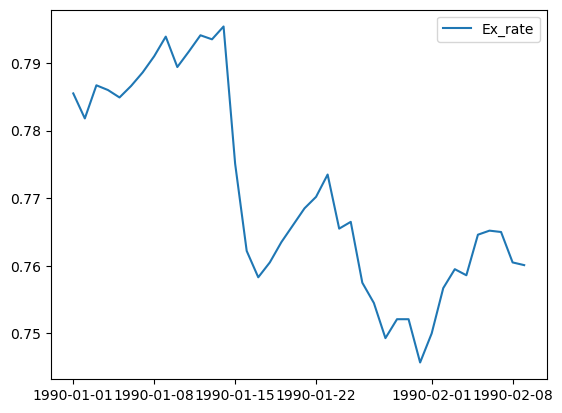

In [4]:
df.head(40).plot()

In [5]:
df.isnull().sum()

Ex_rate    0
dtype: int64

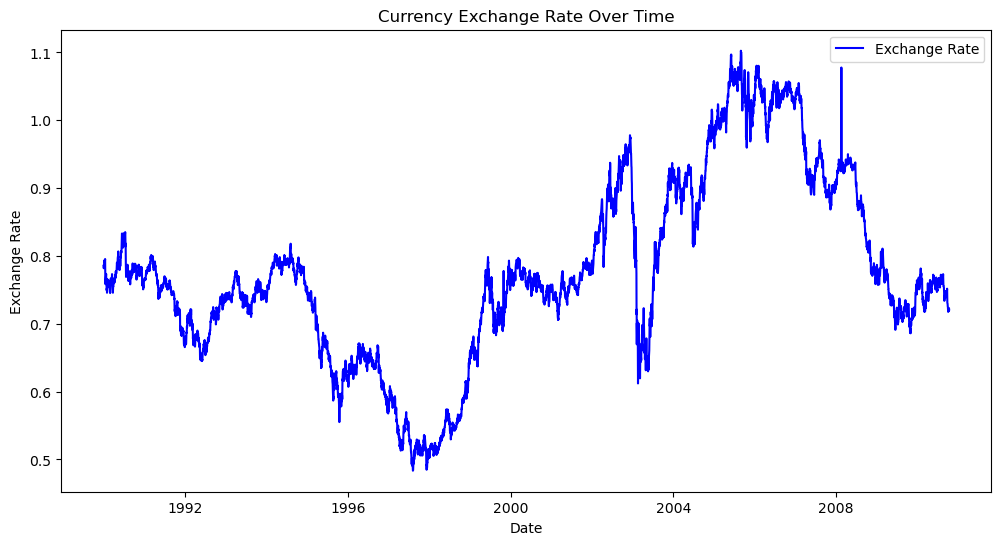

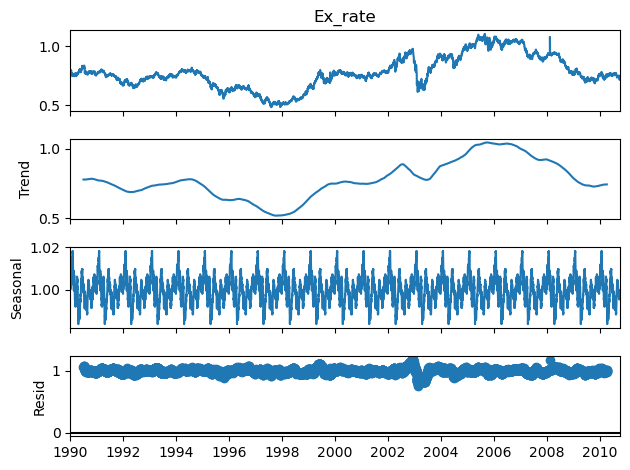

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate', color='blue')
plt.title('Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=365)  # Adjust period as needed

decomposition.plot()
plt.show()


# Part 2: Model Building - ARIMA

# check for stationarity

In [7]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries) 
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
                my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


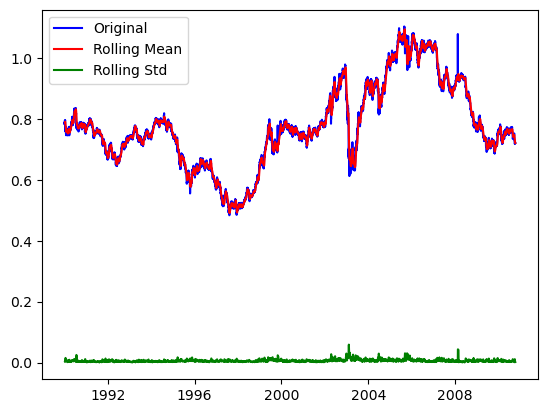

In [8]:
test_stationarity(df['Ex_rate'])

# Differencing

In [9]:
df['diff']=df['Ex_rate']-df['Ex_rate'].shift(12)

In [10]:
df

,Ex_rate,diff
1990-01-01,0.785500,NaN
1990-01-02,0.781800,NaN
1990-01-03,0.786700,NaN
1990-01-04,0.786000,NaN
1990-01-05,0.784900,NaN
...,...,...
2010-10-06,0.718494,-0.012073
2010-10-07,0.721839,-0.007875
2010-10-08,0.723197,-0.006517
2010-10-09,0.720825,-0.005708


In [11]:
df.dropna(inplace=True)

In [12]:
df

,Ex_rate,diff
1990-01-13,0.793500,0.008000
1990-01-14,0.795400,0.013600
1990-01-15,0.775100,-0.011600
1990-01-16,0.762200,-0.023800
1990-01-17,0.758300,-0.026600
...,...,...
2010-10-06,0.718494,-0.012073
2010-10-07,0.721839,-0.007875
2010-10-08,0.723197,-0.006517
2010-10-09,0.720825,-0.005708


Results of Dickey-Fuller Test :

Test Statistic                -1.056518e+01
p-value                        7.549185e-19
#Lags Used                     3.600000e+01
Number of Observations Used    7.539000e+03
Critical Value (1%)           -3.431218e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


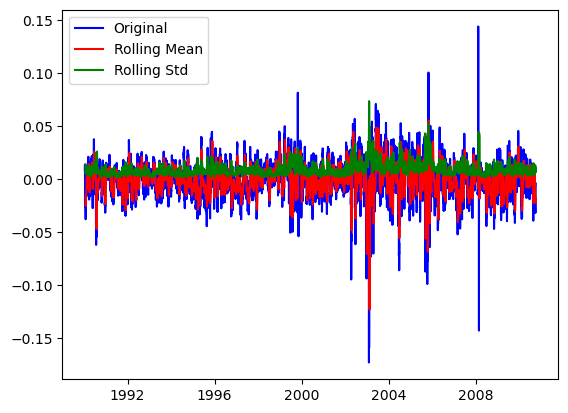

In [13]:
test_stationarity(df['diff'])

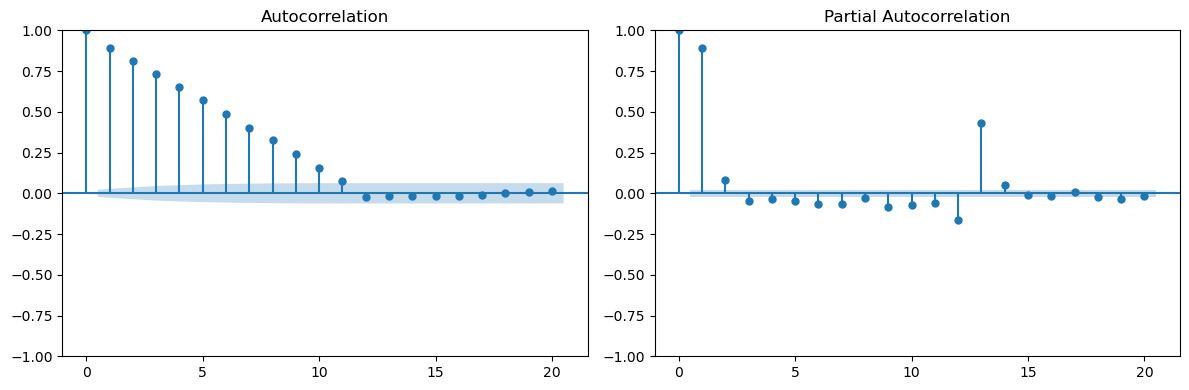

In [14]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df['diff'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(df['diff'], lags=20, ax=axes[1])
plt.tight_layout()

In [15]:
model=ARIMA(df['Ex_rate'],order=(1,1,1))

In [16]:
result=model.fit()


In [17]:
result.predict()

1990-01-13    0.000000
1990-01-14    0.793500
1990-01-15    0.795149
1990-01-16    0.777787
1990-01-17    0.763921
                ...   
2010-10-06    0.718838
2010-10-07    0.718522
2010-10-08    0.721396
2010-10-09    0.723015
2010-10-10    0.721138
Freq: D, Name: predicted_mean, Length: 7576, dtype: float64

In [18]:
result.forecast(20)

2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
2010-10-16    0.720826
2010-10-17    0.720826
2010-10-18    0.720826
2010-10-19    0.720826
2010-10-20    0.720826
2010-10-21    0.720826
2010-10-22    0.720826
2010-10-23    0.720826
2010-10-24    0.720826
2010-10-25    0.720826
2010-10-26    0.720826
2010-10-27    0.720826
2010-10-28    0.720826
2010-10-29    0.720826
2010-10-30    0.720826
Freq: D, Name: predicted_mean, dtype: float64

In [19]:
df['forecast']= result.predict()

In [20]:
df

,Ex_rate,diff,forecast
1990-01-13,0.793500,0.008000,0.000000
1990-01-14,0.795400,0.013600,0.793500
1990-01-15,0.775100,-0.011600,0.795149
1990-01-16,0.762200,-0.023800,0.777787
1990-01-17,0.758300,-0.026600,0.763921
...,...,...,...
2010-10-06,0.718494,-0.012073,0.718838
2010-10-07,0.721839,-0.007875,0.718522
2010-10-08,0.723197,-0.006517,0.721396
2010-10-09,0.720825,-0.005708,0.723015


<Axes: >

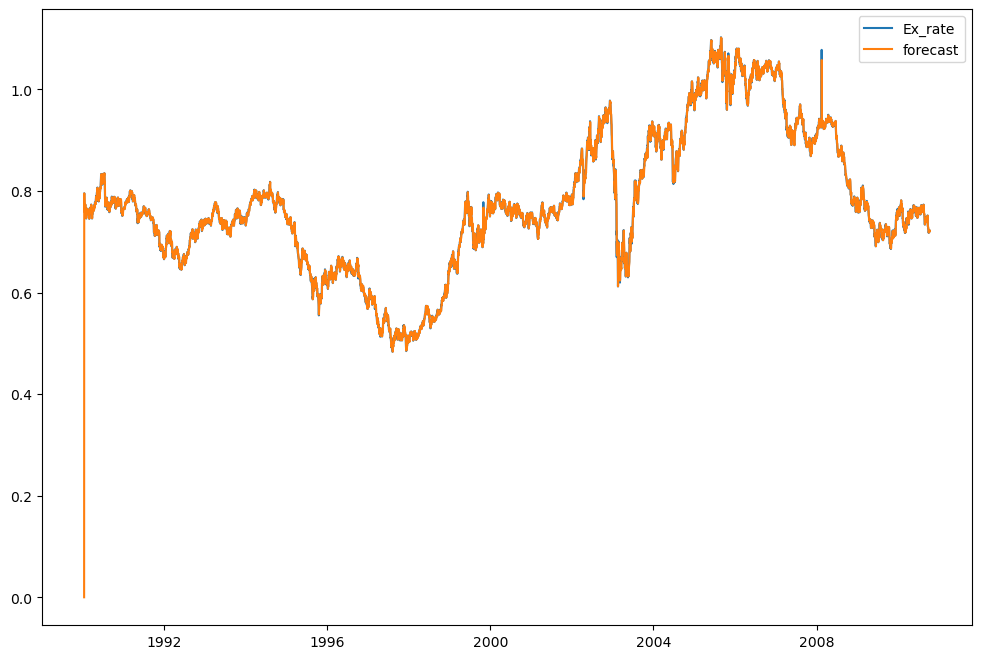

In [21]:
df[['Ex_rate','forecast']].plot(figsize=(12,8))

# Part 3: Model Building - Exponential Smoothing

In [22]:
triple=ExponentialSmoothing(df['Ex_rate'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.3,smoothing_seasonal=0.4)

In [23]:
triple.fittedvalues

1990-01-13    0.790765
1990-01-14    0.790979
1990-01-15    0.780144
1990-01-16    0.769386
1990-01-17    0.763797
                ...   
2010-10-06    0.705827
2010-10-07    0.709591
2010-10-08    0.714061
2010-10-09    0.717816
2010-10-10    0.720211
Length: 7576, dtype: float64

In [24]:
fore=triple.forecast(30)
fore

2010-10-11    0.722792
2010-10-12    0.724517
2010-10-13    0.724791
2010-10-14    0.726772
2010-10-15    0.728961
2010-10-16    0.731429
2010-10-17    0.727939
2010-10-18    0.728086
2010-10-19    0.730689
2010-10-20    0.732246
2010-10-21    0.731925
2010-10-22    0.732561
2010-10-23    0.735061
2010-10-24    0.736816
2010-10-25    0.737095
2010-10-26    0.739108
2010-10-27    0.741335
2010-10-28    0.743845
2010-10-29    0.740296
2010-10-30    0.740445
2010-10-31    0.743092
2010-11-01    0.744675
2010-11-02    0.744350
2010-11-03    0.744996
2010-11-04    0.747539
2010-11-05    0.749323
2010-11-06    0.749607
2010-11-07    0.751655
2010-11-08    0.753919
2010-11-09    0.756471
Freq: D, dtype: float64

In [25]:
df['TES']=ExponentialSmoothing(df['Ex_rate'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.3,smoothing_seasonal=0.4).fittedvalues

In [26]:
df

,Ex_rate,diff,forecast,TES
1990-01-13,0.793500,0.008000,0.000000,0.790765
1990-01-14,0.795400,0.013600,0.793500,0.790979
1990-01-15,0.775100,-0.011600,0.795149,0.780144
1990-01-16,0.762200,-0.023800,0.777787,0.769386
1990-01-17,0.758300,-0.026600,0.763921,0.763797
...,...,...,...,...
2010-10-06,0.718494,-0.012073,0.718838,0.705827
2010-10-07,0.721839,-0.007875,0.718522,0.709591
2010-10-08,0.723197,-0.006517,0.721396,0.714061
2010-10-09,0.720825,-0.005708,0.723015,0.717816


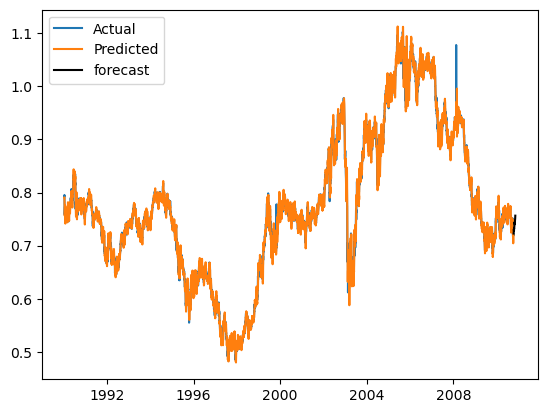

In [27]:
plt.plot(df['Ex_rate'],label='Actual')
plt.plot(df['TES'],label='Predicted')
plt.plot(fore,label='forecast',color='black')
plt.legend(loc='best')

# Part 4: Evaluation and Comparison

In [28]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

# Error metrics for ARIMA

In [29]:
rmse=np.sqrt(mean_squared_error(df['Ex_rate'],df['forecast'])).round(2) 
mae= mean_absolute_error(df['Ex_rate'],df['forecast']).round(2)
mape= round(mean_absolute_percentage_error(df['Ex_rate'],df['forecast'])*100,2)
print(rmse,mae,mape)

0.01 0.0 0.5


# Error metrics for exponential smoothing

In [30]:
rmse_triple=np.sqrt(mean_squared_error(df['Ex_rate'],df['TES'])).round(2) 
mae_triple= mean_absolute_error(df['Ex_rate'],df['TES']).round(2)
mape_triple= round(mean_absolute_percentage_error(df['Ex_rate'],df['TES'])*100,2)
print(rmse_triple,mae_triple,mape_triple)

0.01 0.01 0.99


 # ARIMA

In [ ]:
#The MAE for ARIMA is 0.0, indicating excellent fit to the data.
#MSE is very low (0.01), meaning ARIMA accurately captures the variation in the data.
# MAPE of 0.5% suggests high forecasting accuracy.

# Advantages:
# ARIMA is more suitable for time series with trends or seasonality if differencing and seasonal components are included.
#It performs exceptionally well when the data is properly transformed and stationarity is achieved.

#Limitations:
#ARIMA requires careful parameter tuning (p, d, q).
# not good for seasonal data

# Exponential Smoothing

In [32]:
#RMSE (0.01) is comparable to ARIMA, showing similar accuracy in predictions.
#MAE (0.01) is slightly higher than ARIMA, indicating slightly less precision.
#MAPE (0.99%) is significantly worse than ARIMA, indicating that its relative error in percentage terms is higher.

#Advantages:
#Simpler and computationally efficient.
#Suitable for datasets with consistent trends and seasonality without the need for differencing.

#Limitations:
#Performs poorly with datasets that require more complex modeling of relationships.
#Less flexible compared to ARIMA in handling non-stationary data.

